<a href="https://colab.research.google.com/github/LaetitiaVerel/Odyssey-Quests/blob/master/Linear%20Regression%202%20Multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C          365 non-null    int64  
 14  WINDTEMP_MAX_C          365 non-null    in

In [ ]:
df_weather.head(3)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,1037,62.250,9,6,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,1040,58.125,8,6,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,1040,37.000,6,1,-4,116,116,116,0,1,8.7,very bad,1,3


# Multivariate linear regression with Scikit-Learn

The equation of an univariate linear regresion is a line : aX +b

The equation of a multivariate linear regression with 2 variables is a plan : aW + bX + c

The equation of a multivariate linear regression with n variables is a hyperplan : a1 X1 + a2 X2 + .... + an Xn + b


## Let's start with 2 variables
With Plotly express, show a [3D scatterplot ](https://plotly.com/python/plotly-express/#3d-coordinates)with :
- X-axis : MAX temperature
- Y-axis : MIN temperature
- Z-axis : Sunhours


In [ ]:
# Your code here :

import plotly.express as px

px.scatter_3d(df_weather, x="MAX_TEMPERATURE_C", y="MIN_TEMPERATURE_C", z="SUNHOUR")

Is it hard to read the 3D scatterplot ?

### Let's predict
You have to predict the MAX temperature from 2 variables :
- MIN temperature
- Sunhours

Hey, it's the reason why X has 2 brackets and is uppercase and y has a simple bracket and is lowercase . It can take multiple variables (X) to predict only one target (y). 

**Remember to save the result of your prediction in a cew column 'predict'.**

In [ ]:
# Your code here :

from sklearn.linear_model import LinearRegression

X = df_weather[['MIN_TEMPERATURE_C', 'SUNHOUR']] 
y = df_weather[['MAX_TEMPERATURE_C']]

modelLR = LinearRegression().fit(X, y)

df_weather['PREDICT'] = modelLR.predict(df_weather[['MIN_TEMPERATURE_C', 'SUNHOUR']])

### Let's visualize
With Plotly express, show a 3D scatterplot with :

- X-axis : your new 'predict' column
- Y-axis : MIN temperature
- Z-axis : Sunhours

Move the cube with your mouse. Hey your 3D-scatterplot has a special shape : it's a plan !

In [ ]:
# Your code here :

import plotly.express as px

px.scatter_3d(df_weather, x = "PREDICT", y = "MIN_TEMPERATURE_C", z = "SUNHOUR")

## Multivariate linear regressions with N-variables
Make a prediction with the maximum number of variables. But beware : variables must be numeric. Store your prediction in a new column 'predict2'.

In our 3D human vision, we can't represent a hyperplan. But, let's trust in our computer, it can calculate. So trust it and show a simple scatterplot with :
- X-axis : Date
- Y-axis : MAX temperatures in blue dots and 'predict' in red dots

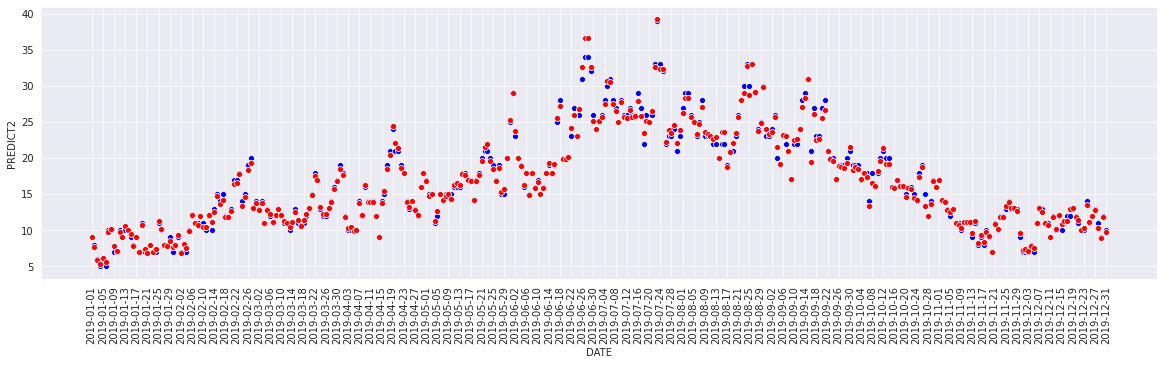

In [ ]:
# Your code here :

from sklearn.linear_model import LinearRegression

X = df_weather[['MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',	'TEMPERATURE_MORNING_C',	'TEMPERATURE_NOON_C',	'TEMPERATURE_EVENING_C', 'PRECIP_TOTAL_DAY_MM',	'HUMIDITY_MAX_PERCENT',	'VISIBILITY_AVG_KM', 'PRESSURE_MAX_MB',	'CLOUDCOVER_AVG_PERCENT',	'HEATINDEX_MAX_C',	'DEWPOINT_MAX_C',	'WINDTEMP_MAX_C',	'WEATHER_CODE_MORNING',	'WEATHER_CODE_NOON', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM',	'UV_INDEX', 'SUNHOUR']] 
y = df_weather[['MAX_TEMPERATURE_C']]

modelLR = LinearRegression().fit(X, y)

df_weather['PREDICT2'] = modelLR.predict(df_weather[['MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',	'TEMPERATURE_MORNING_C',	'TEMPERATURE_NOON_C',	'TEMPERATURE_EVENING_C', 'PRECIP_TOTAL_DAY_MM',	'HUMIDITY_MAX_PERCENT',	'VISIBILITY_AVG_KM', 'PRESSURE_MAX_MB',	'CLOUDCOVER_AVG_PERCENT',	'HEATINDEX_MAX_C',	'DEWPOINT_MAX_C',	'WINDTEMP_MAX_C',	'WEATHER_CODE_MORNING',	'WEATHER_CODE_NOON', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM',	'UV_INDEX', 'SUNHOUR']])

import seaborn as sns

sns.set_style("darkgrid")
fig = plt.figure(figsize = (20, 5))
plt.xticks(range(0, 365, 4), rotation = 90)

sns.scatterplot(x = "DATE", y = "MAX_TEMPERATURE_C", data = df_weather, color = "blue")
sns.scatterplot(x = "DATE", y = "PREDICT2", data = df_weather, color = "red")